For this question, we have tested Kepler's Law as seen below. We used that:

\begin{equation}
\mathbf{r} \times \mathbf{\dot{v}} = \mathbf{r} \times \mathbf{\ddot{r}} = \mathbf{r} \times (\frac{-Gm_j}{R^3}\mathbf{r}) = \mathbf{0}.
\end{equation}

We also used:
\begin{equation}
\mathbf{\dot{r}} \times \mathbf{v} = \mathbf{v} \times \mathbf{v} = \mathbf{0}.
\end{equation}

Therefore we get that
\begin{equation}
\frac{d}{dt}(\mathbf{r} \times \mathbf{v}) = \mathbf{\dot{r}} \times \mathbf{v} + \mathbf{r} \times \mathbf{\dot{v}} = \mathbf{0}
\end{equation}

which implies that $ \mathbf{r} \times \mathbf{v} = constant $.

So in polars,

$$ \mathbf{r} \times \mathbf{v} = \begin{pmatrix} rcos\theta \\ rsin\theta \end{pmatrix} \times \begin{pmatrix} \dot{r}cos\theta - r\dot{\theta}sin\theta \\ \dot{r}sin\theta + r\dot{\theta}cos\theta  \end{pmatrix} $$

$$ = r[r\dot{\theta}(sin^2\theta + cos^2\theta)] = r^2\dot{\theta}. $$

Thus we have $ \frac{1}{2}r^2\dot{\theta} = \frac{dA}{dt} = constant. $


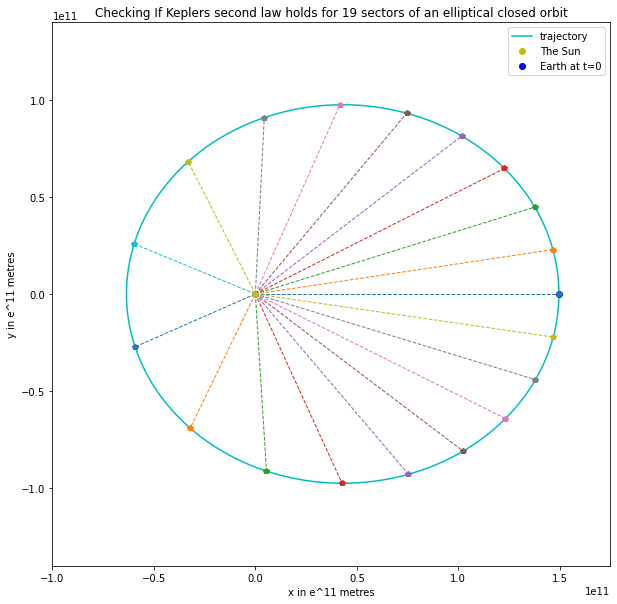

In [1]:
 #Our usual 'Earth + sun' simulation but now we add 'A' which is dA/dt evaluated alongside the VV-Algorithm
import numpy as np
import matplotlib.pyplot as plt
G=6.67408e-11
mass_sun=1.989e30
R=149.59787e9
tmax= 60*60*24*220
dt=1000
N = int(tmax/dt)   #N=19008

t = np.zeros((N,))
r = np.zeros((2,N))
v = np.zeros((2,N))
a = np.zeros((2,N))
A = np.zeros((N,))  #A is a scalar

r[0,0]=R
r[1,0]=0
v[0,0]=0
v[1,0]=23000    #This value of v0 gives us an elliptical orbit a[0,0]=-(G*mass_sun)/((R)**2)
a[1,0]=0


for n in range(0,N-1):
    t[n+1] = t[n] + dt
    r[:,n+1]=r[:,n] + ( v[:,n]*(dt)) + (0.5*(a[:,n])* ((dt)**2))
    a[:,n+1]=( (-1*G*mass_sun) / (np.sqrt((r[0,n+1])**2+(r[1,n+1])**2)**3) * r[:,n+1])
    v[:,n+1]=v[:,n]+0.5*(a[:,n+1]+a[:,n])*(dt)
    A[n+1]=0.5*np.cross(r[:,n+1],v[:,n+1]) #   From before we are using A=0.5*(v x r)

plt.figure(figsize=(10,10))
plt.plot(r[0,:],r[1,:],'c',label='trajectory')
plt.plot(0,'yo',lw=2,label='The Sun')
plt.plot(R,0,'bo',lw=2,label='Earth at t=0')

for i in range(19):
    plt.plot([0,r[0,1000*i]],[0,r[1,1000*i]],'p--',lw=1) #Plotting lines from the sun to the sample points
plt.xlabel('x in e^11 metres')
plt.ylabel('y in e^11 metres')
plt.legend()
plt.title('Checking If Keplers second law holds for 19 sectors of an elliptical closed orbit') 
plt.xlim(-100e9,175e9) 
plt.ylim(-140e9,140e9)

plt.show()

In [2]:
 #Just to check that the time between each sampled point is equal even though they vary in distance around the orbit
for i in range(19): 
    interval=t[1000*(i+1)]-t[1000*i] 
    print(interval)
    
    tdays=t/86400

1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0


In [4]:
#From our sample, we can see that dA/dt is constant for 5 significant figures. 
#As expected their values vary if we dont set a significant limit due to our method using the VV-algorithm. 
import math

sample_Avals=[]

for i in range(1,20):
    dAdt=A[1000*i]
    round_it=round(dAdt, 5-int(math.floor(math.log10(abs(dAdt)))) - 1) #setting the values to 5s.f.

    dAdt="{:.4e}".format(round_it) #converting the values to exponential values to look nicer
    sample_Avals.append(dAdt)
    
#A list of a few of the sample points and their dA/dt values
for i in range(1,12):
    print('At approximately '+str(int(tdays[1000*i]))+' days, dA/dt='+str(sample_Avals[i]))

At approximately 11 days, dA/dt=1.7204e+15
At approximately 23 days, dA/dt=1.7204e+15
At approximately 34 days, dA/dt=1.7204e+15
At approximately 46 days, dA/dt=1.7204e+15
At approximately 57 days, dA/dt=1.7204e+15
At approximately 69 days, dA/dt=1.7204e+15
At approximately 81 days, dA/dt=1.7204e+15
At approximately 92 days, dA/dt=1.7204e+15
At approximately 104 days, dA/dt=1.7204e+15
At approximately 115 days, dA/dt=1.7204e+15
At approximately 127 days, dA/dt=1.7204e+15
